# Read data

In [1]:
import pickle
import gzip
import random
import math
import matplotlib.pyplot as plt
import numpy as np

random.seed(1)

# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
f.close()

# Split train / test

In [2]:
train_set_x = train_set[0]
train_set_y = train_set[1]

test_set_x = test_set[0]
test_set_y = test_set[1]

# Extract desired points

In [3]:
c1 = 7
c2 = 9

X_train = []
Y_train = []

for i, y in enumerate(train_set_y):
    if y not in [c1, c2]: continue
    X_train.append(np.array(train_set_x[i]))
    
    if y == c1:
        Y_train.append(-1)
    if y == c2:
        Y_train.append(1)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = []
Y_test = []

for i, y in enumerate(test_set_y):
    if y not in [c1, c2]:
        continue
    X_test.append(np.array(test_set_x[i]))
    
    if y == c1:
        Y_test.append(-1)
    if y == c2:
        Y_test.append(1)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [4]:
print("Shape of test set:\t(%d,\t%d)" % X_test.shape)
print("Shape of train set:\t(%d,\t%d)" % X_train.shape)

Shape of test set:	(2037,	784)
Shape of train set:	(10163,	784)


# Plotting data points

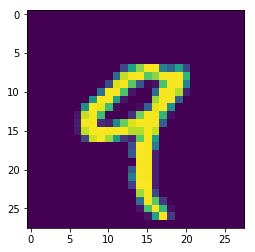

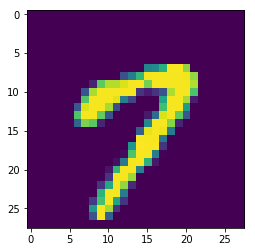

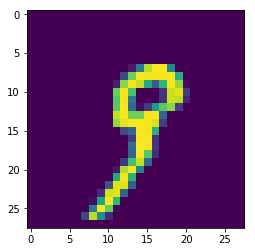

In [5]:
def show_img(x):
    pixels = len(x)
    width = height = int(np.sqrt(pixels))
    
    m = np.zeros((width, height))

    for i in range(width):
        for j in range(height):
            m[i][j] = x[(i % width) * height + j]

    plt.imshow(m)
    plt.show()

show_img(X_train[0])
show_img(X_train[1])
show_img(X_train[2])

# Generating random classifiers

In [6]:
def random_classifier(k, classA, classB):
    cut = np.random.random()
    
    classes = [classA, classB]
    random.shuffle(classes)
    
    def c(X):
        Y = np.zeros(X.shape[0])
        Y.fill(classes[0])
        Y[X[:, k] > cut] = classes[1]
        
        return Y
    
    return c

m = X_train.shape[1] # number of pixels

C = [random_classifier(k, -1, 1) for k in range(m)] # random classifiers

# Evaluating random classifiers

In [7]:
def score(H, X, Y):
    right = 0
    wrong = 0
    
    V = np.zeros(X.shape[0])
    
    for c, alpha in H:
        Y_pred = c(X)
        
        V += Y_pred * alpha
    
    for i, v in enumerate(V):
        v = np.sign(v)

        if v == Y[i]:
            right += 1
        else:
            wrong += 1
    
    return right / float(right + wrong)

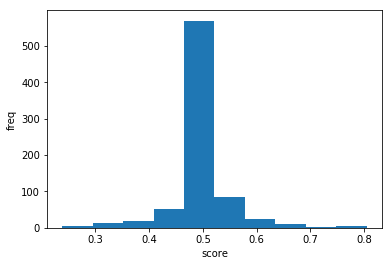

In [8]:
x = []

for c in C:
    P = [(c, 1)]
    x.append(score(P, X_train, Y_train))

plt.hist(x)
plt.xlabel("score")
plt.ylabel("freq")
plt.show()

In [9]:
def error(c, X, Y, p):
    frac = 0
    
    Y_pred = c(X)
    
    frac = np.sum(p[Y != Y_pred])
    
    return frac

def ada_boost(C, X, Y, gamma = 0.01):
    n = X.shape[0] # number of images
    
    H = [] # ensemble
    
    v = np.zeros(n)
    
    right = 0
    wrong = 0
    
    score_history = []
    
    T = 4 * int(math.log(n))
    
    w = np.array([1.0 for k in range(n)])
    p = np.array([1.0 / n for k in range(n)]) # normalized points weights
    
    for t in range(1, T + 1): # generate T classifiers
        # find a gamma weak learner
        errors = np.array([error(c, X, Y, p) for i, c in enumerate(C)])
        i = np.argmin(errors)
        e = errors[i]
        
        if 1 - e < 0.5 + 0.01:
            print("Error: no gamma weak learner found for gamma = %lf" % gamma)
            
            return H, score_history
        
        c = C[i]
        
        Y_pred = c(X)
        
        alpha = 0.5 * np.log((1 - e) / e)
        
        H.append((c, alpha))
        
        for i, x in enumerate(X):
            v[i] += Y_pred[i] * alpha
            
            if np.sign(v[i]) == Y[i]:
                right += 1
            else:
                wrong += 1
        
        score = right / float(right + wrong)
        score_history.append(score)
        
        if t > 0:
            print("t = %d/%d, score = %lf" % (t, T, score))
        
        if score > 0.99:
            return H, score_history
        
        w = w * np.exp(-1 * alpha * Y * Y_pred)
        p = w / np.sum(w)
        
    return H, score_history

# Running boosting

In [10]:
H, score_history = ada_boost(C, X_train, Y_train)

t = 1/36, score = 0.804585
t = 2/36, score = 0.804585
t = 3/36, score = 0.812588
t = 4/36, score = 0.818213
t = 5/36, score = 0.823064
t = 6/36, score = 0.828414
t = 7/36, score = 0.835538
t = 8/36, score = 0.840512
t = 9/36, score = 0.844556
t = 10/36, score = 0.848303
t = 11/36, score = 0.851824
t = 12/36, score = 0.855235
t = 13/36, score = 0.857969
t = 14/36, score = 0.861275
t = 15/36, score = 0.863833
t = 16/36, score = 0.866519
t = 17/36, score = 0.868855
t = 18/36, score = 0.870915
t = 19/36, score = 0.872924
t = 20/36, score = 0.874747
t = 21/36, score = 0.876518
t = 22/36, score = 0.878177
t = 23/36, score = 0.879632
t = 24/36, score = 0.881031
t = 25/36, score = 0.882417
t = 26/36, score = 0.883741
t = 27/36, score = 0.885084
t = 28/36, score = 0.886282
t = 29/36, score = 0.887408
t = 30/36, score = 0.888478
t = 31/36, score = 0.889469
t = 32/36, score = 0.890424
t = 33/36, score = 0.891323
t = 34/36, score = 0.892219
t = 35/36, score = 0.893055
t = 36/36, score = 0.893910


# Plotting score history

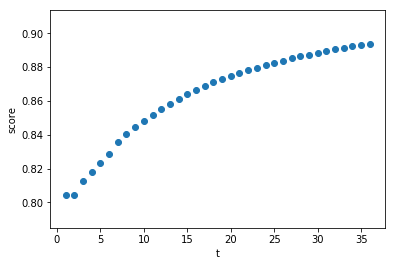

In [11]:
x = range(1, len(score_history) + 1)
plt.scatter(x, score_history)
plt.xlabel("t")
plt.ylabel("score")
plt.show()

# Evaluating train set

In [12]:
score(H, X_train, Y_train)

0.9238413854176917

# Evaluating test set

In [13]:
score(H, X_test, Y_test)

0.9317623956799215

# Alphas

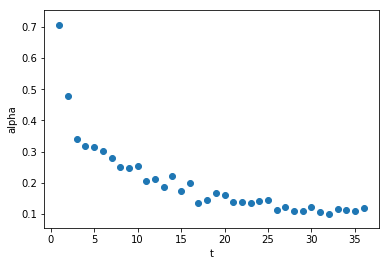

In [14]:
y = []

for cl, alpha in H:
    y.append(alpha)

x = range(1, len(y) + 1)
plt.scatter(x, y)
plt.xlabel("t")
plt.ylabel("alpha")
plt.show()